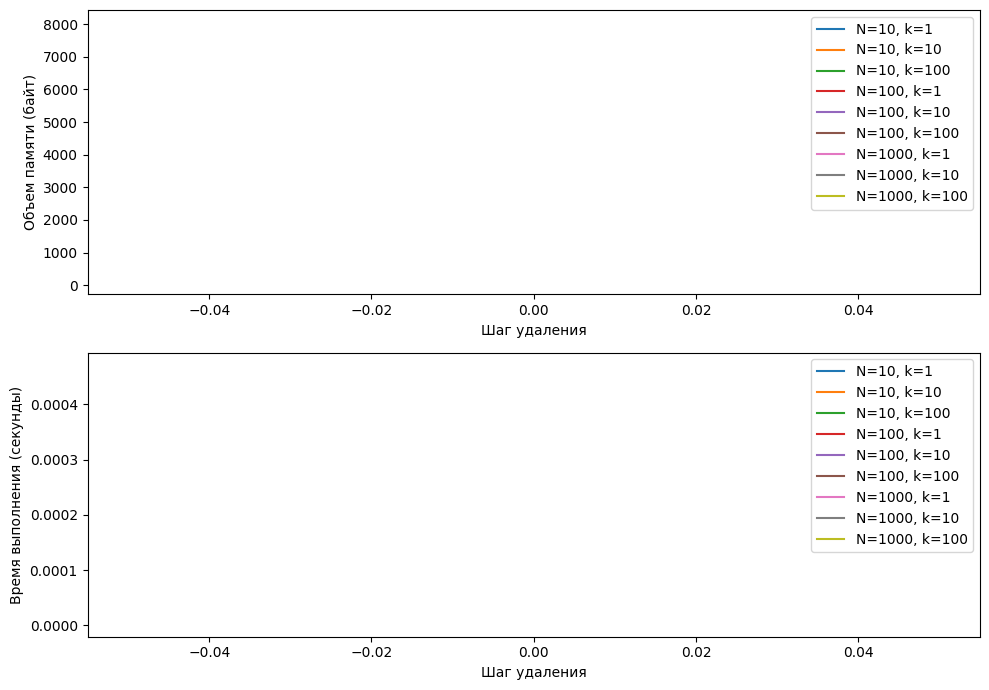

In [1]:
import matplotlib.pyplot as plt
import timeit

def remove_elements(arr, k):
    while len(arr) >= k:
        del arr[len(arr) // 2:len(arr) // 2 + k]

def memory_usage(arr):
    return arr.__sizeof__()

N_values = [10, 100, 1000]  # Различные значения N
k_values = [1, 10, 100]  # Различные значения k

memory_results = []
time_results = []

for N in N_values:
    for k in k_values:
        # Создаем список data внутри цикла
        data = list(range(N))
        
        # Измеряем объем памяти
        memory = memory_usage(data)
        memory_results.append((N, k, memory))
    
        # Измеряем время
        time = timeit.timeit(lambda: remove_elements(data[:], k), number=1)
        time_results.append((N, k, time))

# Построение графика для объема памяти
plt.figure(1, figsize=(10, 7))

plt.subplot(211)
for N in N_values:
    for k in k_values:
        memory = [result[2] for result in memory_results if result[0] == N and result[1] == k]
        plt.plot(range(len(memory)), memory, label=f'N={N}, k={k}')

plt.xlabel('Шаг удаления')
plt.ylabel('Объем памяти (байт)')
plt.legend()

# Построение графика для времени выполнения
plt.subplot(212)
for N in N_values:
    for k in k_values:
        time = [result[2] for result in time_results if result[0] == N and result[1] == k]
        plt.plot(range(len(time)), time, label=f'N={N}, k={k}')

plt.xlabel('Шаг удаления')
plt.ylabel('Время выполнения (секунды)')
plt.legend()

plt.tight_layout()
plt.show()


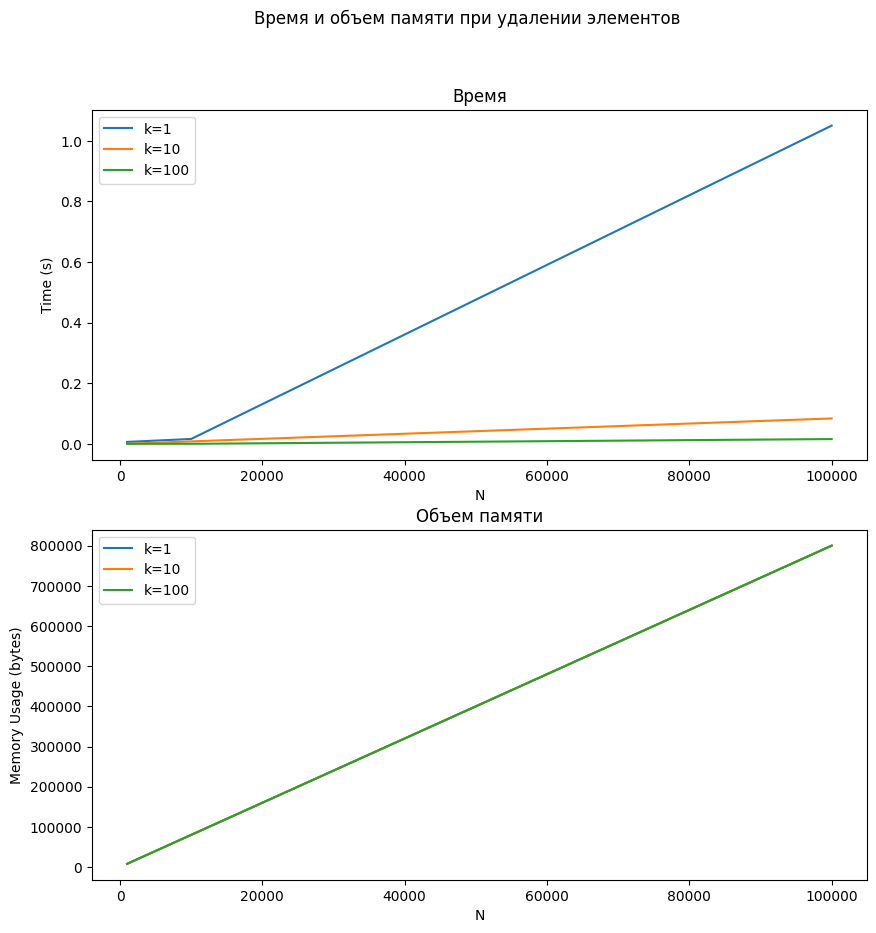

In [2]:
import matplotlib.pyplot as plt
import time
import sys

def delete_elements(data, k):
    start_time = time.time()
    memory_usage = sys.getsizeof(data)
    while len(data) >= k:
        del data[len(data)//2:len(data)//2+k]
        memory_usage = max(memory_usage, sys.getsizeof(data))
    end_time = time.time()
    return end_time - start_time, memory_usage

# Задайте различные значения N и k
N_values = [1000, 10000, 100000]
k_values = [1, 10, 100]

time_data = {}
memory_data = {}

for N in N_values:
    for k in k_values:
        data = list(range(N))
        time_elapsed, max_memory = delete_elements(data, k)
        time_data[(N, k)] = time_elapsed
        memory_data[(N, k)] = max_memory

# Построим графики
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle("Время и объем памяти при удалении элементов")

# График времени
axes[0].set_title("Время")
axes[0].set_xlabel("N")
axes[0].set_ylabel("Time (s)")
for k in k_values:
    times = [time_data[(N, k)] for N in N_values]
    axes[0].plot(N_values, times, label=f'k={k}')
axes[0].legend()

# График объема памяти
axes[1].set_title("Объем памяти")
axes[1].set_xlabel("N")
axes[1].set_ylabel("Memory Usage (bytes)")
for k in k_values:
    memory_usages = [memory_data[(N, k)] for N in N_values]
    axes[1].plot(N_values, memory_usages, label=f'k={k}')
axes[1].legend()

plt.show()


In [ ]:
data1 = [1, 2, 3]
data2 = [4, 5, 6]

data1.extend(data2)